### 타이타닉 생존자 예측 대회

In [2]:
### 02. 데이터 수집 - 내부, 외부...수집
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("./data/titanic/train.csv")
test = pd.read_csv("./data/titanic/test.csv")
sub = pd.read_csv("./data/titanic/gender_submission.csv")

train.shape, test.shape, sub.shape

((891, 12), (418, 11), (418, 2))

In [3]:
### 03. 데이터 탐색 및 전처리
### head(), tail(), columns, shape, info(), describe(), dtype
### barplot, histogram, boxplot, scatter, corr()..
print( train.columns )
print( test.columns )
print( sub.columns )

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Survived'], dtype='object')


* Survival : 생존 여부	Survival. 0 = No, 1 = Yes
* Pclass : 티켓의 클래스	Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd
* Sex : 성별(Sex)	남(male)/여(female)
* Age : 나이(Age in years.)	
* SibSp : 함께 탑승한 형제와 배우자의 수 / siblings, spouses aboard the Titanic.	
* Parch : 함께 탑승한 부모, 아이의 수	# of parents / children aboard the Titanic.
* Ticket : 티켓 번호(Ticket number)	(ex) CA 31352, A/5. 2151
* Fare : 탑승료(Passenger fare)	
* Cabin : 객실 번호(Cabin number)	
* Embarked : 탑승 항구(Port of Embarkation)	C = Cherbourg, Q = Queenstown, S = Southampton
* siblings : 형제, 자매, 형제, 의붓 형제
* spouses : 남편, 아내 (정부와 약혼자는 무시)
* Parch : Parent(mother, father), child(daughter, son, stepdaughter, stepson)

##### EDA - 시각화

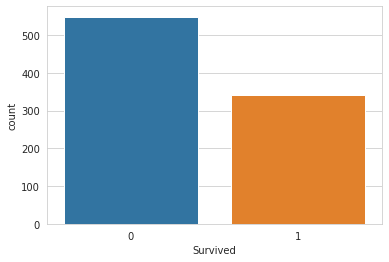

In [4]:
sns.set_style('whitegrid')   # seaborn 스타일 지정
sns.countplot(x='Survived', data=train)

##### 04~05 문제 확인 및 머신러닝 모델 선택

In [5]:
### 04. 문제 확인 - 머신러닝 어떤 문제? 지도학습/비지도학습 - 회귀/분류
### Survived : 생존 유무(0, 1)
### knn, decisionTree
### 05. 머신러닝 모델 선택
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [6]:
### 모델을 위한 데이터 컬럼 선택
sel = ['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare']
all_X = train[ sel  ]  # 여러개 컬럼 선택(학습을 위한)
all_y = train['Survived']

In [7]:
## 자체 평가를 위한 데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_X, all_y, 
                                                    test_size=0.3,
                                                    random_state=0)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 5), (268, 5), (623,), (268,))

##### 06. 모델 학습 및 평가

In [8]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
model1 = KNeighborsClassifier()      # 모델 선택
model1.fit(X_train, y_train)         # 모델 학습
print("knn 모델의 정확도(tr) : ", model1.score(X_train, y_train) )
print("knn 모델의 정확도(test) : ", model1.score(X_test, y_test) )

model2 = DecisionTreeClassifier(random_state=0) 
model2.fit(X_train, y_train)
print("의사결정트리 모델의 정확도(tr) : ", model2.score(X_train, y_train) )
print("의사결정트리 모델의 정확도(test) : ", model2.score(X_test, y_test) )

knn 모델의 정확도(tr) :  0.7303370786516854
knn 모델의 정확도(test) :  0.667910447761194
의사결정트리 모델의 정확도(tr) :  1.0
의사결정트리 모델의 정확도(test) :  0.6604477611940298


* 추가 실습
      * 가장 최적의 k값을 찾기
      * 가장 최적의 max_depth를 찾기

In [9]:
dep_num = range(1, 11, 1)

for i in dep_num:
  model2 = DecisionTreeClassifier(max_depth=i, random_state=0) 
  model2.fit(X_train, y_train)

  print(f"depth : {i}")
  print("의사결정트 모델의 정확도(tr) : ", model2.score(X_train, y_train) )
  print("의사결정트 모델의 정확도(test) : ", model2.score(X_test, y_test) )

depth : 1
의사결정트 모델의 정확도(tr) :  0.666131621187801
의사결정트 모델의 정확도(test) :  0.6716417910447762
depth : 2
의사결정트 모델의 정확도(tr) :  0.7046548956661316
의사결정트 모델의 정확도(test) :  0.7089552238805971
depth : 3
의사결정트 모델의 정확도(tr) :  0.7191011235955056
의사결정트 모델의 정확도(test) :  0.7313432835820896
depth : 4
의사결정트 모델의 정확도(tr) :  0.7415730337078652
의사결정트 모델의 정확도(test) :  0.7201492537313433
depth : 5
의사결정트 모델의 정확도(tr) :  0.7528089887640449
의사결정트 모델의 정확도(test) :  0.7350746268656716
depth : 6
의사결정트 모델의 정확도(tr) :  0.7849117174959872
의사결정트 모델의 정확도(test) :  0.7126865671641791
depth : 7
의사결정트 모델의 정확도(tr) :  0.8186195826645265
의사결정트 모델의 정확도(test) :  0.7052238805970149
depth : 8
의사결정트 모델의 정확도(tr) :  0.8507223113964687
의사결정트 모델의 정확도(test) :  0.7350746268656716
depth : 9
의사결정트 모델의 정확도(tr) :  0.8828250401284109
의사결정트 모델의 정확도(test) :  0.6977611940298507
depth : 10
의사결정트 모델의 정확도(tr) :  0.9052969502407705
의사결정트 모델의 정확도(test) :  0.6828358208955224


##### 07. 최종 모델로 test의 생존 유무 예측

In [10]:
# test 데이터 셋의 컬럼 선택
# sel = ['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare']

last_test = test[sel]

In [11]:
### 최종 모델
model2 = DecisionTreeClassifier(max_depth=5, random_state=0) 
model2.fit(X_train, y_train)
pred = model2.predict(last_test)
pred

ValueError: ignored

##### 문제 발생.
##### Error
    ValueError: Input contains NaN, infinity or a value too large for dtype('float32').
    * 원인 : test 데이터에 결측치가 존재하여 이를 최종 모델이 해결못함.
    * 해결 : 결측치 처리

In [12]:
### 결측치 행 확인

In [13]:
test.loc[  test['Fare'].isnull() , :]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


##### 결측치 처리 후, 확인

In [14]:
### 결측치 처리 - Fare 어떤 값으로 넣어줄까요? 평균값 또는 중앙값
## [].loc[행, 열]
# test.loc[  test['Fare'].isnull() , "Fare" ] = test['Fare'].mean()
test['Fare'] = test['Fare'].fillna( test['Fare'].mean() ) 
test[  test['Fare'].isnull() ]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [16]:
# test 데이터 셋의 컬럼 선택
# sel = ['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare']

last_test = test[sel]

### 최종 모델
model2 = DecisionTreeClassifier(max_depth=5, random_state=0) 
model2.fit(X_train, y_train)
pred = model2.predict(last_test)
pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [17]:
print( len(pred) )

sub.columns

418


Index(['PassengerId', 'Survived'], dtype='object')

In [18]:
sub['Survived'] = pred
sub.to_csv("first_baseline.csv", index=False)

#### 08. 모델 개선
    Sex를 우리 학습 모델에 추가해보기. (male, female)를 숫자로 변경하기

In [19]:
train['Sex'].unique() 

array(['male', 'female'], dtype=object)

In [20]:
train['Sex'].value_counts() 

male      577
female    314
Name: Sex, dtype: int64

In [21]:
train.loc[ train['Sex']=='male' , 'Sex_num' ] = 0
train.loc[ train['Sex']=='female' , 'Sex_num' ] = 1

train.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0.0


##### 실습
    test 셋의 컬럼을 변경해 보기

In [22]:
test.loc[ test['Sex']=='male' , 'Sex_num' ] = 0
test.loc[ test['Sex']=='female' , 'Sex_num' ] = 1

test.head(7)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1.0


In [23]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_num'],
      dtype='object')

In [24]:
sel = ['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_num']
all_X = train[ sel  ]  # 여러개 컬럼 선택(학습을 위한)
all_y = train['Survived']


### 데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_X, all_y, 
                                                    test_size=0.3,
                                                    random_state=0)

# 마지막 테스트를 위한 데이터 
last_test = test[ sel ]

In [25]:
model1 = KNeighborsClassifier(n_neighbors=22)      # 모델 선택
model1.fit(X_train, y_train)         # 모델 학습
print("knn 모델의 정확도(tr) : ", model1.score(X_train, y_train) )
print("knn 모델의 정확도(test) : ", model1.score(X_test, y_test) )

model2 = DecisionTreeClassifier(max_depth=5, random_state=0) 
model2.fit(X_train, y_train)
print("의사결정트리 모델의 정확도(tr) : ", model2.score(X_train, y_train) )
print("의사결정트리 모델의 정확도(test) : ", model2.score(X_test, y_test) )

knn 모델의 정확도(tr) :  0.6709470304975923
knn 모델의 정확도(test) :  0.7201492537313433
의사결정트리 모델의 정확도(tr) :  0.8378812199036918
의사결정트리 모델의 정확도(test) :  0.7910447761194029


In [26]:
### 최종 모델
model2 = DecisionTreeClassifier(max_depth=5, random_state=0) 
model2.fit(X_train, y_train)
pred = model2.predict(last_test)

sub['Survived'] = pred
sub.to_csv("second_sex_add.csv", index=False)

##### 더 생각해 보고 실습해 보기
    * 승선상 정보 추가
    * Cabin 정보 추가
    * Name 을 이용한 정보 추가
    * 결측치 처리 후, Age 정보 추가
    * (자율 과제) 이중의 하나의 정보를 추가해서 제출해 보기